# Feature Engineering für eine Drohnen Fernsteuerung, die mit einem MPU6050 ausgestattet ist

## 1. Einlesen der Datei und überprüfen, ob die Datenreihen vollständig sind

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix as scatmat
import os


# Absolute Pfad zur Datei extrahieren
ziel_pfad = 'D:\measurements'

# CSV-Datei einlesen
data = pd.read_csv(os.path.join(ziel_pfad, 'mpu6050.csv'), sep=',', decimal='.')

# Die ersten Zeilen anzeigen
data.head()

# Informationen über den Datensatz anzeigen
data.info()

# Sind alle Klassen gleich stark vertreten?
data['RuheState'].value_counts()

# Gibt es Auffälligkeiten bei der Verteilung der Werte?
data.describe()

## 2. Irrelevante Merkmale entfernen

In [ ]:
# data = data.drop(['user', 'gender'], axis=1)

# 3. Visualisierung der Verteilung der numerischen Werte

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
data.hist(bins=50, figsize=(20, 15))
plt.show()

## 4. Überprüfen, ob es fehlerhafte Werte gibt (Bspw.: in Spalte 'AccX')

In [ ]:
pd.set_option('display.max_rows', 500)
data['AccX'].value_counts()

## 5. Fehlerhaften Wert korrigieren (Beispiel)

In [ ]:
#data.loc[data['z4'] == '-14420-11-2011 04:50:23.713', 'z4'] = -144

# Spalte 'z4' in numerischen Typ umwandeln
#data['z4'] = pd.to_numeric(data['z4'])

# Informationen über den Datensatz erneut anzeigen
data.info()

## 6. Aufteilung des Datensatzes in Trainings- und Validierungsdaten

In [14]:
# Aufteilung in Trainings- und Validierungsdatensätze
train, val = train_test_split(data, test_size=0.2, random_state=42)

# Anzahl der Datensätze anzeigen
len(train), len(val)

# Kopie des Trainingsdatensatzes für Modifikationen
data = train.copy()


## 7. Begrenzung der Auswahl auf die Sensorspalten

In [ ]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

## 8. Prüfung der Korrelationen für verschiedene Sensoren

In [ ]:
sensors = ['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'AngleX', 'AngleY', 'AngleZ', 'RuheState', 'FernstState', 'TranspState']

for sensor_group in [sensors[:3], sensors[3:6], sensors[6:9]]:
    scatmat(data[sensor_group], figsize=(15, 10))
    plt.show()

## 9. Visualisierung der Klassenzuordnung im Scatterplot (Beispiel)

In [ ]:
# Erstellung einer neuen Spalte "class_num" mit einem numerischen Wert je Klasse
# (Nicht notwendig, da die Rohdaten bereits in dieser Form vorliegen)

#data['class_num'], data_categories = data['RuheState'].factorize()

# Anzeige der Zuordnung der Klassen
#for i, cat in enumerate(data_categories):
#    print("Klasse %d: %s" % (i, cat))


## 9. Visualisierung der Klassenzuordnung im Scatterplot

In [ ]:
# Dieser Abschnitt macht das selbe wie der Nachfolgende, zählt aber nicht wie häufig eine Klasse vorkommt

# Anzeige der eindeutigen Klassenwerte
#unique_classes = data[['RuheState', 'FernstState', 'TranspState']].drop_duplicates().reset_index(drop=True)

#for i, row in unique_classes.iterrows():
#    print(f"Klasse {i}: Ruhe={row['RuheState']}, Fernsteuerung={row['FernstState']}, Transport={row['TranspState']}")


In [ ]:
# Gruppiere nach den Klassenattributen und zähle die Anzahl der Vorkommen
class_counts = data.groupby(['RuheState', 'FernstState', 'TranspState']).size().reset_index(name='count')

# Anzeige aller Kombinationen
for i, row in class_counts.iterrows():
    print(f"Klasse {i}: Ruhe={row['RuheState']}, Fernsteuerung={row['FernstState']}, Transport={row['TranspState']} - Anzahl: {row['count']}")


## 10. Scatterplots für verschiedene Sensorpaare (Beispiel)

In [ ]:
# Wähle Sensorpaare
sensor_pairs = [('AccX', 'AccY'), ('GyroX', 'GyroY'), ('GyroZ', 'AngleX'), ('AngleY', 'AngleZ')]

for pair in sensor_pairs:
    data.plot(kind="scatter", x=pair[0], y=pair[1], alpha=0.1, c='class_num', cmap=plt.get_cmap('jet'))
    plt.show()

## 10. Scatterplots für verschiedene Sensorpaare

In [ ]:
# Erstelle eine temporäre Spalte 'class' basierend auf One-Hot-Encoding
data['class'] = data.apply(lambda row: 1 if row['RuheState'] == 1 else (2 if row['FernstState'] == 1 else 3), axis=1)

# Visualisiere Scatterplots für jedes Sensor-Paar
sensor_pairs = [('AccX', 'AccY'), ('GyroX', 'GyroY'), ('GyroZ', 'AngleX'), ('AngleY', 'AngleZ')]
for pair in sensor_pairs:
    data.plot(kind="scatter", x=pair[0], y=pair[1], alpha=0.1, c='class', cmap=plt.get_cmap('jet'))
    #plt.title(f'Unskalierte Werte - {pair[0]} vs. {pair[1]}')
    plt.show()

# Entferne die temporäre 'class'-Spalte
data.drop('class', axis=1, inplace=True)


## 11. One Hot encoding der Klasse durchführen, wenn noch nicht geschehen (Beispiel)

In [ ]:
#from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder(categories='auto');
#data_label_matrix = data["class"].values.reshape(-1, 1)
#data_labels_1hot = encoder.fit_transform(data_label_matrix)
#data_labels_1hot.shape

## 12. Skalierung der Messwerte

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#data.drop('class', axis=1, inplace=True) # Ist bereits in Schritt 11 erfolgt
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
#print("data_scaled.shape:", data_scaled.shape, "\ndata_scaled:\n", data_scaled) # uncomment to visualize details

## 14. Skatterplots von Messwertpaaren mit vorheriger Skalierung

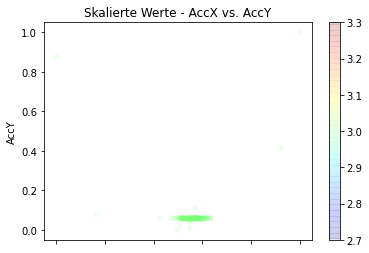

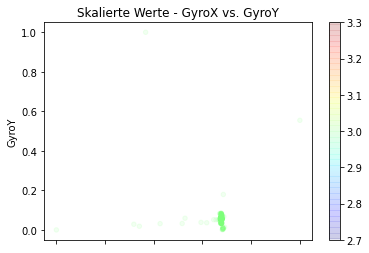

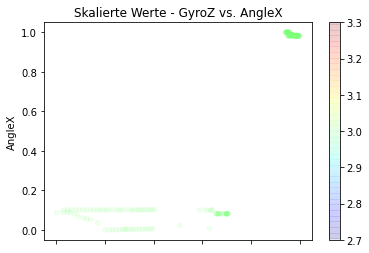

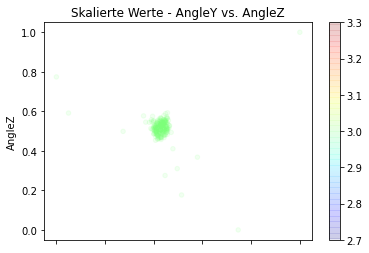

In [22]:
# Skalierte Werte in einem neuen DataFrame mit den ursprünglichen Spaltennamen
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)


# Erstelle eine temporäre Spalte 'class' basierend auf One-Hot-Encoding
data_scaled_df['class'] = data_scaled_df.apply(lambda row: 1 if row['RuheState'] == 1 else (2 if row['FernstState'] == 1 else 3), axis=1)


# Visualisiere Scatterplots für jedes Sensor-Paar mit den skalierten Werten und den originalen Klassen
sensor_pairs = [('AccX', 'AccY'), ('GyroX', 'GyroY'), ('GyroZ', 'AngleX'), ('AngleY', 'AngleZ')]
for pair in sensor_pairs:
    data_scaled_df.plot(kind="scatter", x=pair[0], y=pair[1], alpha=0.1, c=data_scaled_df['class'], cmap=plt.get_cmap('jet'))
    plt.title(f'Skalierte Werte - {pair[0]} vs. {pair[1]}')
    plt.show()

# Entferne die temporäre 'class'-Spalte
#data_scaled_df.drop('class', axis=1, inplace=True)


# 15. Vorverarbeitung

In [ ]:
#

# 16. Training des kNN

In [25]:
from sklearn import neighbors
import numpy as np

num_features = 14
X = np.zeros([len(data_scaled_df), num_features])
y = np.ones([len(data_scaled_df)])
k = 15
clf = neighbors.KNeighborsClassifier(n_neighbors=k)
clf.fit(data_scaled_df, y)

KNeighborsClassifier(n_neighbors=15)

# 17. Prediction

In [46]:
y_predict = clf.predict(data_scaled_df)

acc = np.mean(y_predict == (data_scaled_df['class'] == 3).astype(int).values)
acc

1.0

In [45]:
y_predict

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.